# Approximate y=sin(x)

In this turorial, we will learn how to approximate arbitrary function using MLP. Here we pick y=sin(x) for example to show the common procedure. The codes are running under Python 2.7+ with MXNet.

First let's import the modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mxnet as mx

## 1. Network Definition

Then, we define a 2-layer MLP in a flavour of symbolic programming provided by MXNet. The rough graph of the network will be displayed after running following codes.

Pay attention to the activation function and loss function.

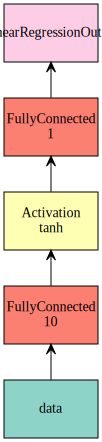

In [2]:
data = mx.sym.Variable('data')
fc1 = mx.sym.FullyConnected(data = data, name = 'fc1', num_hidden = 10)
act1 = mx.sym.Activation(data = fc1, name = 'act1', act_type = 'tanh')
fc2 = mx.sym.FullyConnected(data = act1, name = 'fc2', num_hidden = 1)
mlp = mx.sym.LinearRegressionOutput(data = fc2, name = 'linear')

mx.viz.plot_network(mlp)

Call list_arguments method on a symbol to get the names of all its inputs:

In [3]:
mlp.list_arguments()

['data', 'fc1_weight', 'fc1_bias', 'fc2_weight', 'fc2_bias', 'linear_label']

## 2. Training Data Generation

After constructting the network, let's generate some training data. Recall that the target function is y=sin(x).

In [4]:
num_points = 51
train_x = np.linspace(-1, 1, num_points)
train_y = np.sin(np.pi * train_x)

train_iter = mx.io.NDArrayIter(train_x, label={'linear_label': train_y})

## 3. Network Training and Prediction

Train the MLP network and then use the trained MLP to predict new values. The training process may take a few time, so please be patient before you see the result figure.

Pay attention to the meanings of various parameters. Try to modify them and re-run it to see the differences.

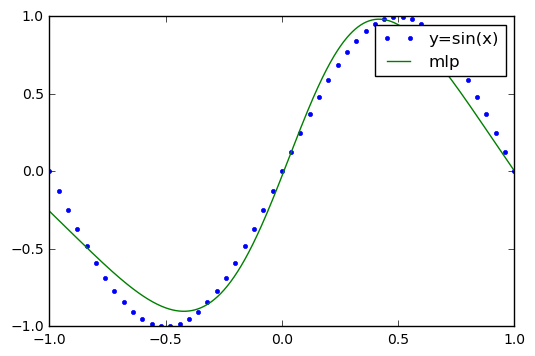

In [5]:
initializer = mx.init.Uniform(1)
model = mx.model.FeedForward(
    ctx = mx.cpu(),
    symbol = mlp,
    num_epoch = 100,
    learning_rate = 0.1,
    initializer=initializer
)

model.fit(
    X = train_iter, 
    eval_data = train_iter
)

x = np.linspace(-1, 1, 1001)
t = np.sin(np.pi * x)
y = model.predict(x)

plt.plot(train_x, train_y, '.')
plt.plot(x, y, '-')
plt.legend(['y=sin(x)', 'mlp'])
plt.show()